# Gradient Descent

In [1]:
from Ch08_gradient_descent import *
import matplotlib.pyplot as plt
import random
from Ch04LinearAlgebra import vector_mean, distance

## The Idea Behind Gradient Descent

## Estimating the Gradient

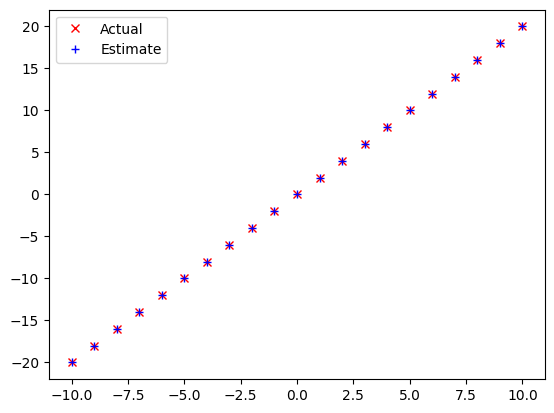

In [2]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [different_quotient(square, x) for x in xs]
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend()
plt.show()

## Using the Gradient

In [3]:
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1_000):
    grad = sum_of_squared_gradient(v)
    v = gradient_step(v, grad, step_size=-0.01)
    
# v should be close to 0
assert distance(v, [0, 0, 0]) < 1e-4, '未满足收敛条件'

## Choosing the Right Step Size

## Using Gradient Descent to Fit Models

In [9]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [10]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 1e-3
slope_history = [theta[0]]
intercept_history = [theta[1]]

for epoch in range(5_000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    slope_history.append(theta[0])
    intercept_history.append(theta[1])
    # print(epoch, theta)
slope, intercept = theta

assert distance(theta, (20, 5)) < .1, '回归系数应该接近'
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

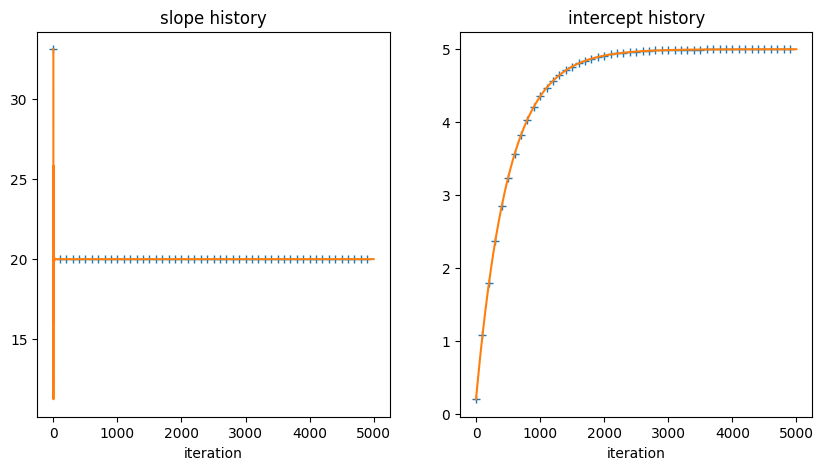

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for data, ax in zip([slope_history, intercept_history], axes.ravel()):
    ax.plot(range(5_000), data[1:], '+', markevery=100)
    ax.plot(range(5_000), data[1:])
    ax.set_xlabel('iteration')
axes[0].set_title('slope history')
axes[1].set_title('intercept history')
plt.show()

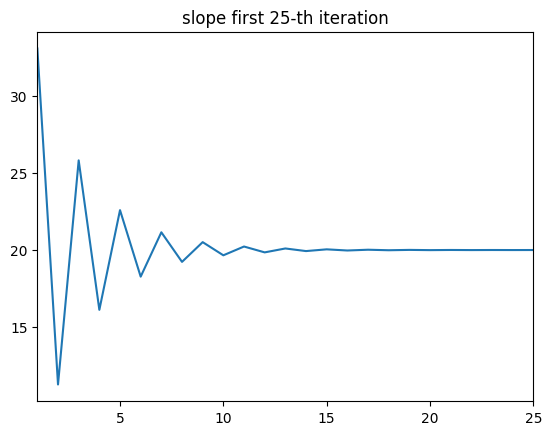

In [12]:
plt.plot(range(1, 26), slope_history[1:26])
plt.xlim([1, 25])
plt.title('slope first 25-th iteration')
plt.show()

## Minibatch and Stochastic Gradient Descent

In [18]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(1_000):
    for batch in minibatch(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

In [21]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

- 创建时间：20230324
- 最后修改：20230324
- 创建人：Stephen CUI